In [1]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [2]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

In [3]:
D = nx.DiGraph()

In [4]:
from google.colab import files
uploaded1 = files.upload()

Saving democrats_retweets_edges.csv to democrats_retweets_edges.csv


In [6]:
with open('democrats_retweets_edges.csv', 'r') as f:
  reader = csv.reader(f)
  next(reader, None)

  for row in f:
    s= row.split(',')
    D.add_edge(s[0], s[1], weight=s[2])

In [7]:
print(nx.info(D))

Name: 
Type: DiGraph
Number of nodes: 222
Number of edges: 2208
Average in degree:   9.9459
Average out degree:   9.9459


In [8]:
density = nx.density(D)
print("Network density:", density)

Network density: 0.045004280298397946


In [9]:
degree_dict = dict(D.degree(D.nodes()))
nx.set_node_attributes(D, degree_dict, 'degree')

In [10]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('SpeakerPelosi', 106)
('RepDavidTrone', 78)
('RepKClark', 74)
('WhipClyburn', 73)
('LeaderHoyer', 68)
('RepBonnie', 60)
('RepDonBeyer', 58)
('RepJohnLarson', 55)
('RepCardenas', 53)
('RepMaloney', 50)
('RepRaskin', 50)
('RepBobbyRush', 49)
('RepBarbaraLee', 45)
('RepChuyGarcia', 44)
('RepDean', 43)
('BobbyScott', 43)
('janschakowsky', 42)
('RepShalala', 42)
('RepMcGovern', 41)
('RepSylviaGarcia', 41)


In [11]:
betweenness_dict = nx.betweenness_centrality(D) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(D, betweenness_dict, 'betweenness')

In [12]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('RepDavidTrone', 0.0416717178646793)
('LeaderHoyer', 0.022084806851528423)
('RepBonnie', 0.019977302896665713)
('RepKClark', 0.017819579825929573)
('WhipClyburn', 0.010920402890131846)
('RepJohnLarson', 0.010751851738043121)
('SpeakerPelosi', 0.010640252741020017)
('RepCardenas', 0.009741603048858207)
('janschakowsky', 0.0094935027394653)
('RepMcGovern', 0.009143580663465802)
('RepChuyGarcia', 0.008079794055570176)
('RepRubenGallego', 0.00803298335651277)
('RepShalala', 0.007912229121279682)
('RepMaloney', 0.00748778742799871)
('RepBobbyRush', 0.007377456423206658)
('RepLindaSanchez', 0.007353329953226289)
('RepMarciaFudge', 0.007183668949159477)
('BillPascrell', 0.0071801235221974034)
('RepRaskin', 0.0067767339039081585)
('RepAdamSchiff', 0.00665174328085032)


In [13]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: RepDavidTrone | Betweenness Centrality: 0.0416717178646793 | Degree: 78
Name: LeaderHoyer | Betweenness Centrality: 0.022084806851528423 | Degree: 68
Name: RepBonnie | Betweenness Centrality: 0.019977302896665713 | Degree: 60
Name: RepKClark | Betweenness Centrality: 0.017819579825929573 | Degree: 74
Name: WhipClyburn | Betweenness Centrality: 0.010920402890131846 | Degree: 73
Name: RepJohnLarson | Betweenness Centrality: 0.010751851738043121 | Degree: 55
Name: SpeakerPelosi | Betweenness Centrality: 0.010640252741020017 | Degree: 106
Name: RepCardenas | Betweenness Centrality: 0.009741603048858207 | Degree: 53
Name: janschakowsky | Betweenness Centrality: 0.0094935027394653 | Degree: 42
Name: RepMcGovern | Betweenness Centrality: 0.009143580663465802 | Degree: 41
Name: RepChuyGarcia | Betweenness Centrality: 0.008079794055570176 | Degree: 44
Name: RepRubenGallego | Betweenness Centrality: 0.00803298335651277 | Degree: 29
Name: RepShalala | Betweenness Centrality: 0.0079122291212

In [34]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes


In [35]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(D)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(D)[node] == max(nx.betweenness_centrality(D).values())


{'RepDavidTrone'}


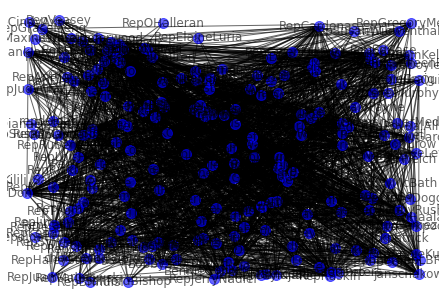

In [14]:
nx.draw_random(D, with_labels=True, node_color='b',
        node_size=100, arrows=False, alpha=0.6)
plt.show()

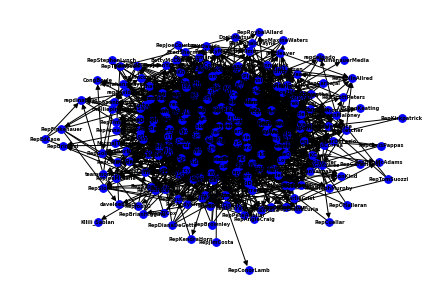

In [15]:
nx.draw(D, pos = nx.nx_pydot.graphviz_layout(D), node_size=60, node_color='blue', \
    linewidths=0.99, font_size=5, font_weight='bold', with_labels=True)
plt.show()

In [16]:
R = nx.DiGraph()

In [17]:
from google.colab import files
uploaded2 = files.upload()

Saving republican_retweets_edges.csv to republican_retweets_edges.csv


In [18]:
with open('republican_retweets_edges.csv', 'r') as f:
  reader = csv.reader(f)
  next(reader, None)

  for row in f:
    s= row.split(',')
    R.add_edge(s[0], s[1], weight=s[2])

In [19]:
print(nx.info(R))

Name: 
Type: DiGraph
Number of nodes: 190
Number of edges: 1272
Average in degree:   6.6947
Average out degree:   6.6947


In [20]:
density = nx.density(R)
print("Network density:", density)

Network density: 0.035421888053467


In [21]:
degree_dict = dict(R.degree(R.nodes()))
nx.set_node_attributes(R, degree_dict, 'degree')

In [22]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('GOPLeader', 150)
('SteveScalise', 124)
('RepBradWenstrup', 66)
('Jim_Jordan', 47)
('RepKevinBrady', 40)
('DesJarlaisTN04', 36)
('RepMikeJohnson', 35)
('RepAndyBiggsAZ', 34)
('RepTedBudd', 33)
('CongressmanHice', 32)
('RepArrington', 30)
('RepJeffDuncan', 28)
('RepHartzler', 27)
('GReschenthaler', 27)
('RepDLamborn', 25)
('RepRickCrawford', 24)
('RepKenBuck', 23)
('ConawayTX11', 23)
('RepArmstrongND', 23)
('repkevinhern', 22)


In [23]:
betweenness_dict = nx.betweenness_centrality(R) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(R, betweenness_dict, 'betweenness')

In [24]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('GOPLeader', 0.1280328362725467)
('SteveScalise', 0.04854819142986682)
('Jim_Jordan', 0.015521799671718616)
('DesJarlaisTN04', 0.008887820642065433)
('RepMcCaul', 0.006849155564749958)
('RepTomEmmer', 0.005486402598864604)
('RepRickCrawford', 0.005312289266065812)
('RepTedBudd', 0.00508668890616766)
('RepHuizenga', 0.005009198804845097)
('repkevinhern', 0.004839255621297162)
('RepBradWenstrup', 0.0042029406982125655)
('CongressmanHice', 0.004179803861781001)
('RepKinzinger', 0.00398185673008368)
('RepJohnJoyce', 0.003921150393714784)
('RepMikeJohnson', 0.0036943187987879002)
('RepJeffDuncan', 0.0034895368862564845)
('RepKenBuck', 0.0034691090649878486)
('RepHartzler', 0.0034565468729136047)
('RepGosar', 0.003136451733850528)
('RepWesterman', 0.0029858062216218235)


In [25]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: GOPLeader | Betweenness Centrality: 0.1280328362725467 | Degree: 150
Name: SteveScalise | Betweenness Centrality: 0.04854819142986682 | Degree: 124
Name: Jim_Jordan | Betweenness Centrality: 0.015521799671718616 | Degree: 47
Name: DesJarlaisTN04 | Betweenness Centrality: 0.008887820642065433 | Degree: 36
Name: RepMcCaul | Betweenness Centrality: 0.006849155564749958 | Degree: 18
Name: RepTomEmmer | Betweenness Centrality: 0.005486402598864604 | Degree: 21
Name: RepRickCrawford | Betweenness Centrality: 0.005312289266065812 | Degree: 24
Name: RepTedBudd | Betweenness Centrality: 0.00508668890616766 | Degree: 33
Name: RepHuizenga | Betweenness Centrality: 0.005009198804845097 | Degree: 18
Name: repkevinhern | Betweenness Centrality: 0.004839255621297162 | Degree: 22
Name: RepBradWenstrup | Betweenness Centrality: 0.0042029406982125655 | Degree: 66
Name: CongressmanHice | Betweenness Centrality: 0.004179803861781001 | Degree: 32
Name: RepKinzinger | Betweenness Centrality: 0.0039818

In [36]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(R)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(R)[node] == max(nx.betweenness_centrality(R).values())


{'GOPLeader'}


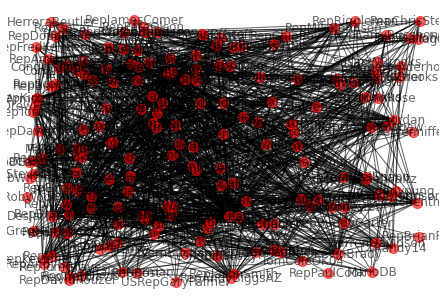

In [31]:
nx.draw_random(R, with_labels=True, node_color='r',
        node_size=100, arrows=False, alpha=0.6)
plt.show()

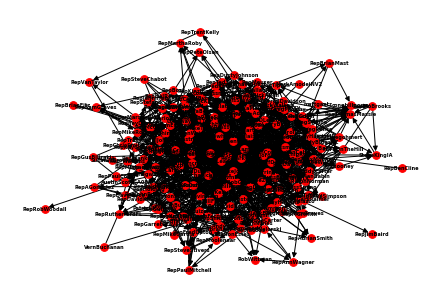

In [32]:
nx.draw(R, pos = nx.nx_pydot.graphviz_layout(R), node_size=60, node_color='red', \
    linewidths=0.99, font_size=5, font_weight='bold', with_labels=True)
plt.show()

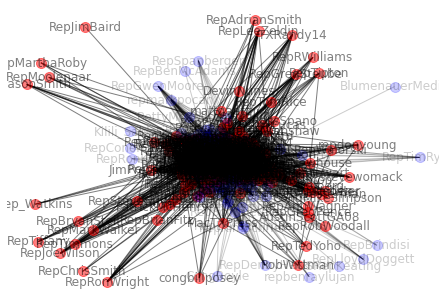

In [33]:
nx.draw(D,pos = nx.draw(R, with_labels=True, node_color='r',
        node_size=100, arrows=False, alpha=0.5), with_labels=True, node_color='b',
        node_size=100, arrows=False, alpha=0.2)
plt.show()